# Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
hr_df = pd.read_csv("..\dataset\hr_data.csv")
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
# review the columns and data types
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


# Data Processing

## Categorical Columns

In [4]:
hr_df.select_dtypes(exclude=['int64', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [5]:
print(hr_df['department'].unique())
department = hr_df['department'].value_counts()
department

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

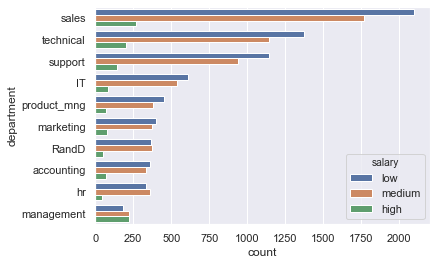

In [6]:
chart = sns.countplot(y='department', data=hr_df, order=hr_df['department'].value_counts().index, hue='salary')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [7]:
hr_df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [8]:
hr_df['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

## Numberical columns

In [9]:
hr_df[hr_df.select_dtypes(['int64', 'float']).columns].describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Load Employee Satisfaction Dataset

In [10]:
# !pip install xlrd
emp_df = pd.read_excel('..\dataset\employee_satisfaction_evaluation.xlsx')
emp_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [11]:
emp_df.isnull().sum()

EMPLOYEE #             0
satisfaction_level    27
last_evaluation       27
dtype: int64

## Merge hr data with employee data

In [12]:
df = hr_df.set_index('employee_id').join(emp_df.set_index('EMPLOYEE #'))
df = df.reset_index()
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [13]:
print('df shape: ', df.shape , '\n', 
'hr_df: ', hr_df.shape, '\n',
'emp_df: ', emp_df.shape, '\n')

df shape:  (14999, 11) 
 hr_df:  (14999, 9) 
 emp_df:  (14999, 3) 



## Missing values

In [16]:
df[df.isnull().any(axis=1)].shape

(43, 11)

In [17]:
df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [18]:
df.dtypes

employee_id                int64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
satisfaction_level       float64
last_evaluation          float64
dtype: object

In [24]:
print(df['satisfaction_level'].nunique())
print(df['last_evaluation'].nunique())
print(df[['satisfaction_level','last_evaluation']].describe())

92
65
       satisfaction_level  last_evaluation
count        14972.000000     14972.000000
mean             0.612830         0.716125
std              0.248714         0.171138
min              0.090000         0.360000
25%              0.440000         0.560000
50%              0.640000         0.720000
75%              0.820000         0.870000
max              1.000000         1.000000


In [26]:
df_copy = df.copy()
df.fillna(df.mean(), inplace=True)

In [27]:
df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

# Visualization

In [28]:
df = df.drop(columns='employee_id')
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


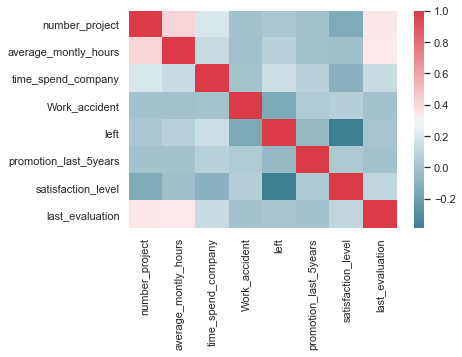

In [41]:
sns.heatmap(df.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True))

# Features Processing
## categorical features

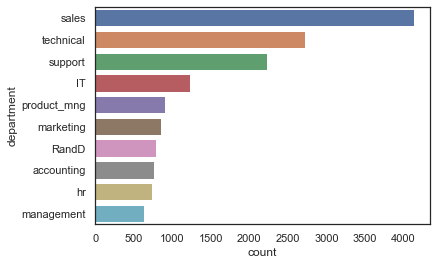

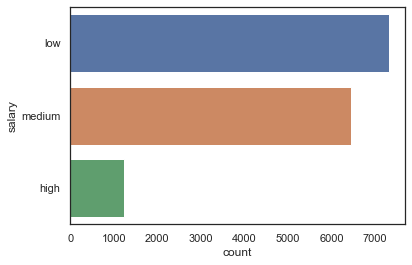

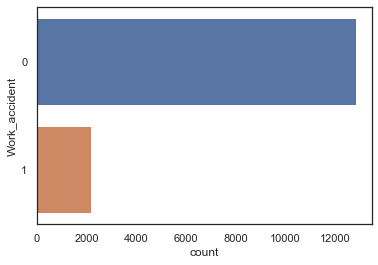

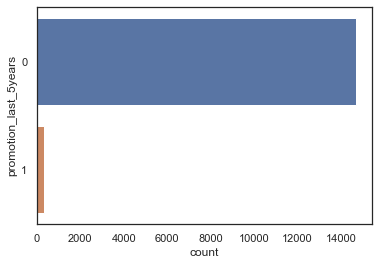

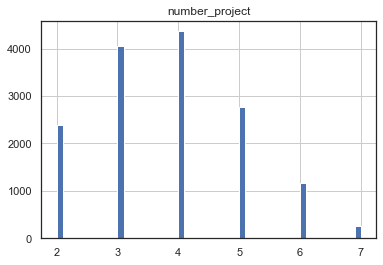

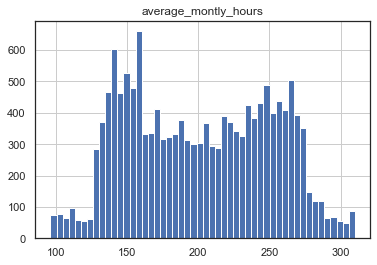

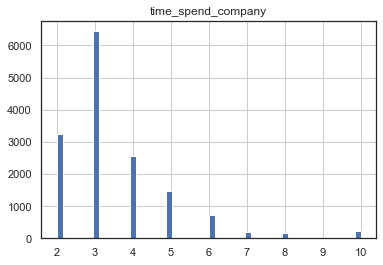

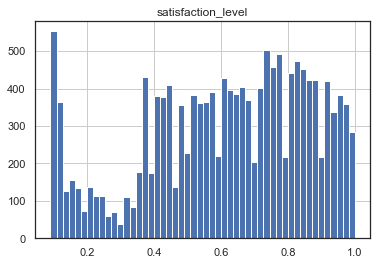

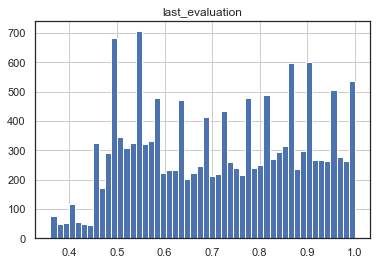

In [54]:
cat = ['department','salary','Work_accident', 'promotion_last_5years']
num = ['number_project', 'average_montly_hours', 'time_spend_company', 'satisfaction_level', 'last_evaluation']
l = ['left']
for col in cat:
    sns.countplot(y=col, data=df,order=df[col].value_counts().index)
    plt.show()

for col in num:
    df[col].hist(bins=50)
    plt.title(col)
    plt.show()

In [67]:
df_features = pd.get_dummies(df, columns=cat, drop_first=True)
df_features.head()

,number_project,average_montly_hours,time_spend_company,left,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,Work_accident_1,promotion_last_5years_1
0,2,157,3,1,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0,0,0
1,5,262,6,1,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1,0,0
2,7,272,4,1,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1,0,0
3,5,223,5,1,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2,159,3,1,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0,0,0


## Train test split

In [79]:
from sklearn.model_selection import train_test_split
X = df_features.values
y = df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
df_train = pd.DataFrame(data=X_train_scaled, columns=df_features.columns)
df_train.head()

,number_project,average_montly_hours,time_spend_company,left,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,Work_accident_1,promotion_last_5years_1
0,2.580195,1.176592,0.345007,1.774306,-2.093938,0.726684,-0.240708,-0.235121,-0.223148,-0.207653,-0.246413,-0.25159,1.610688,-0.421362,-0.461884,1.025372,-0.873023,-0.411599,-0.148322
1,0.151880,-1.059126,-0.340891,-0.563601,0.835528,-0.384406,-0.240708,-0.235121,-0.223148,-0.207653,-0.246413,-0.25159,1.610688,-0.421362,-0.461884,-0.975256,-0.873023,-0.411599,-0.148322
2,0.151880,0.457968,1.030905,-0.563601,1.076306,0.317335,-0.240708,-0.235121,4.481331,-0.207653,-0.246413,-0.25159,-0.620853,-0.421362,-0.461884,1.025372,-0.873023,2.429546,-0.148322
3,0.151880,0.957013,-0.340891,-0.563601,0.394102,1.369947,-0.240708,-0.235121,4.481331,-0.207653,-0.246413,-0.25159,-0.620853,-0.421362,-0.461884,1.025372,-0.873023,-0.411599,-0.148322
4,1.770757,1.715560,0.345007,1.774306,-2.013679,0.726684,-0.240708,4.253127,-0.223148,-0.207653,-0.246413,-0.25159,-0.620853,-0.421362,-0.461884,-0.975256,1.145446,-0.411599,-0.148322


# Logistic Regression Model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 100.00%
[[3460    0]
 [   0 1040]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3460
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



## Random Forest Classifer

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 100.00%
[[3460    0]
 [   0 1040]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3460
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



# DNN model

### Save preprocessed data into tensors format

In [84]:
from sklearn.model_selection import train_test_split
X = df_features.values
y = df['left'].values
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train0, y_train0, test_size = 0.3)

In [86]:
print(X_train.shape, X_validation.shape, X_test.shape)

(8399, 19) (3600, 19) (3000, 19)


In [87]:
np.savez('data_train', inputs=X_train, targets=y_train)
np.savez('data_validation', inputs=X_validation, targets=y_validation)
np.savez('data_test', inputs=X_test, targets=y_test)

In [88]:
import tensorflow as tf
npz = np.load('data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('data_validation.npz')
validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('data_test.npz')
test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

## Create DNN models with TensorFlow 2.0

In [96]:
input_size = 19
output_size = 2
hidden_layer_size = 50


model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 100
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta = 1e-3, mode = 'min',patience=2)
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, 
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 #
          )  

Epoch 1/100
84/84 - 0s - loss: 3.6730 - accuracy: 0.6456 - val_loss: 0.5567 - val_accuracy: 0.7697
Epoch 2/100
84/84 - 0s - loss: 0.5345 - accuracy: 0.7603 - val_loss: 0.4989 - val_accuracy: 0.7697
Epoch 3/100
84/84 - 0s - loss: 0.4824 - accuracy: 0.7666 - val_loss: 0.4304 - val_accuracy: 0.7711
Epoch 4/100
84/84 - 0s - loss: 0.4022 - accuracy: 0.8305 - val_loss: 0.3341 - val_accuracy: 0.8422
Epoch 5/100
84/84 - 0s - loss: 0.3032 - accuracy: 0.9030 - val_loss: 0.2767 - val_accuracy: 0.9819
Epoch 6/100
84/84 - 0s - loss: 0.2144 - accuracy: 0.9570 - val_loss: 0.1670 - val_accuracy: 0.9844
Epoch 7/100
84/84 - 0s - loss: 0.1554 - accuracy: 0.9779 - val_loss: 0.1195 - val_accuracy: 0.9956
Epoch 8/100
84/84 - 0s - loss: 0.1025 - accuracy: 0.9952 - val_loss: 0.0860 - val_accuracy: 0.9950
Epoch 9/100
84/84 - 0s - loss: 0.0745 - accuracy: 0.9968 - val_loss: 0.0599 - val_accuracy: 0.9989
Epoch 10/100
84/84 - 0s - loss: 0.0560 - accuracy: 0.9983 - val_loss: 0.0447 - val_accuracy: 0.9989
Epoch 11/

In [98]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

94/94 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000


In [99]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.00. Test accuracy: 100.00%
